In [30]:
library(ggplot2)
library(dplyr)

In [31]:
df <- read.csv("results/N100-F1000-S100-R20-result-v4.csv") %>% mutate(algorithm = factor(algorithm))
summary(df)

  correlation        load      algorithm       value          
 Min.   :0.00   Min.   :0.70   BF  :2100   Min.   :       -1  
 1st Qu.:0.25   1st Qu.:0.75   RR  :2100   1st Qu.:  1499111  
 Median :0.50   Median :0.80   SALP:2100   Median :  2153059  
 Mean   :0.50   Mean   :0.80               Mean   :  2905543  
 3rd Qu.:0.75   3rd Qu.:0.85               3rd Qu.:  3451526  
 Max.   :1.00   Max.   :0.90               Max.   :109037631  
  disturbance     
 Min.   :  3.053  
 1st Qu.: 56.149  
 Median : 78.887  
 Mean   : 80.576  
 3rd Qu.:109.697  
 Max.   :142.985  

`summarise()` regrouping output by 'correlation', 'load' (override with `.groups` argument)

Saving 6.67 x 6.67 in image

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



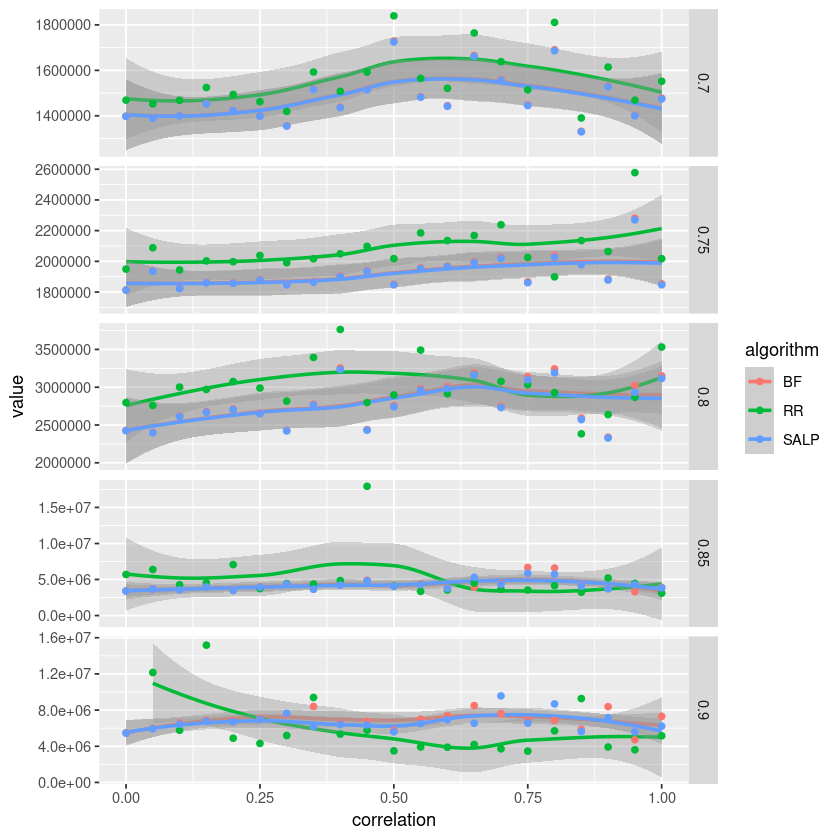

In [32]:
plt <- ggplot(
    df %>% filter(value != -1) %>% group_by(correlation, load, algorithm) %>% summarise(value=mean(value)),
    aes(x=correlation, y=value, color=algorithm)
) + 
geom_smooth() + 
geom_point() + 
facet_grid(load ~ ., scales="free")

ggsave("plot-lateness.png")

plt

`summarise()` regrouping output by 'correlation', 'load' (override with `.groups` argument)

Saving 6.67 x 6.67 in image



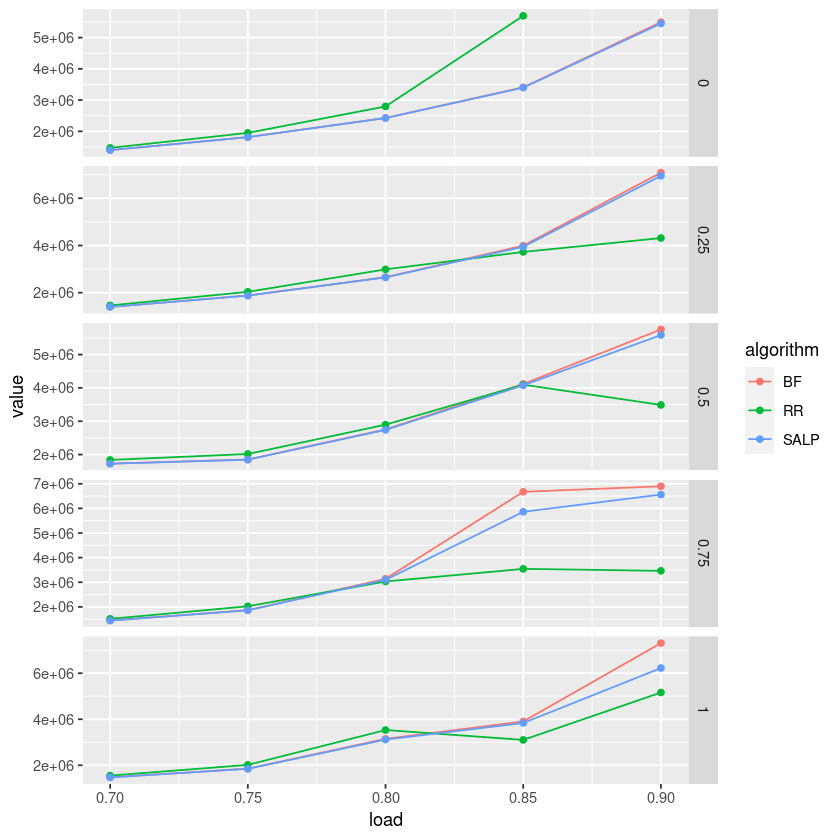

In [33]:
plt <- ggplot(
    df %>% filter(value != -1) %>% 
      filter(correlation %in% c(0, .25, .5, .75, 1)) %>%
      group_by(correlation, load, algorithm) %>% 
      summarise(value=mean(value)),
    aes(x=load, y=value, color=algorithm)
) + 
geom_line() + 
geom_point() + 
facet_grid(correlation ~ ., scales="free")

ggsave("plot-late-pivot.png")

plt

`summarise()` regrouping output by 'correlation', 'load' (override with `.groups` argument)

Saving 6.67 x 6.67 in image

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



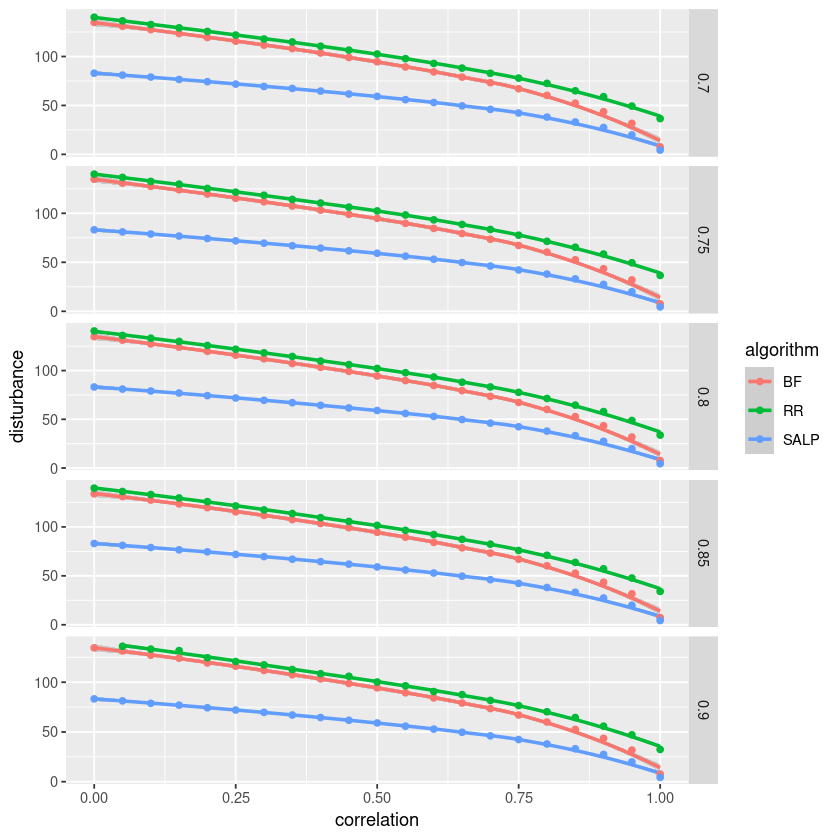

In [34]:
plt <- ggplot(
    df %>% filter(value != -1) %>% group_by(correlation, load, algorithm) %>% summarise(disturbance=mean(disturbance)),
    aes(x=correlation, y=disturbance, color=algorithm)
) + 
geom_smooth() + 
geom_point() + 
facet_grid(load ~ ., scales="free")

ggsave("plot-disturbance.png")

plt

`summarise()` regrouping output by 'correlation', 'load' (override with `.groups` argument)

Saving 6.67 x 6.67 in image



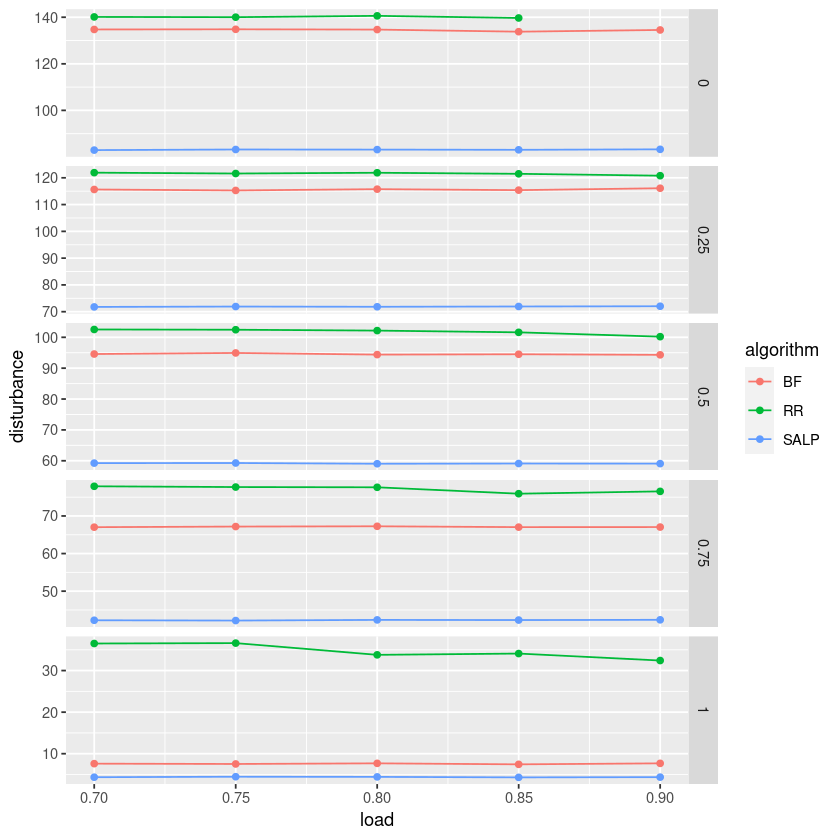

In [35]:
plt <- ggplot(
    df %>% filter(value != -1) %>% 
      filter(correlation %in% c(0, .25, .5, .75, 1)) %>%
      group_by(correlation, load, algorithm) %>% 
      summarise(disturbance=mean(disturbance)),
    aes(x=load, y=disturbance, color=algorithm)
) + 
geom_line() + 
geom_point() + 
facet_grid(correlation ~ ., scales="free")

ggsave("plot-disturbance-pivot.png")

plt

In [36]:
df %>% filter(value==-1) %>% count(algorithm, load)

algorithm,load,n
<fct>,<dbl>,<int>
BF,0.85,5
BF,0.90,30
RR,0.75,1
RR,0.80,37
RR,0.85,169
RR,0.90,340
SALP,0.85,3
SALP,0.90,27


In [37]:
df %>% filter(algorithm == "RR" & load == "0.9") %>% count(algorithm, load)

algorithm,load,n
<fct>,<dbl>,<int>
RR,0.9,420
